In [16]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import cv2
import torchvision.transforms as T
from torchvision import models
import numpy as np

In [ ]:
segmentation_model = models.segmentation.fcn_resnet101(pretrained=True).eval()
seg_transforms = T.Compose([                 
                            T.ToPILImage(),
                            T.Resize(224),
                            T.ToTensor(), 
                            T.Normalize(mean = [0.485, 0.456, 0.406], 
                                        std = [0.229, 0.224, 0.225])])

In [18]:
def image_to_mask(image_path):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

    inp = seg_transforms(image).unsqueeze(0)
    out = segmentation_model(inp)['out']
    om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
    om = np.array([om,om,om]).transpose(1,2,0).astype(np.float32)
    out= cv2.resize(om, (image.shape[1], image.shape[0]))
    return out

In [ ]:
!wget -O s.jpg https://i0.wp.com/www.horsetalk.co.nz/wp-content/uploads/2016/08/shiny-coat-stock.jpg?resize=800%2C445

In [35]:
!pip install git+https://github.com/Mayukhdeb/torch-dreams

In [60]:
from torch_dreams.dreamer import dreamer
import torchvision.models as models

In [61]:
model = models.inception_v3(pretrained=True)
model.eval()
dreamy_boi = dreamer(model)

dreamer init on:  cuda


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


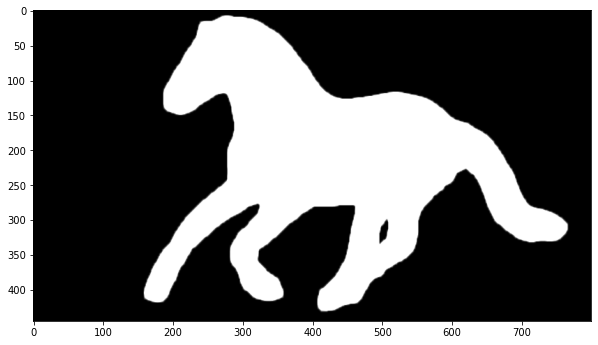

In [67]:
grad_mask = cv2.blur(image_to_mask("s.jpg"), (10,10))
plt.imshow(grad_mask)

In [82]:
def custom_func(layer_outputs):
        loss = layer_outputs[0].norm()
        return loss
    

In [86]:
config = {
    "image_path": "s.jpg",
    "layers": [model.Mixed_5d],
    "octave_scale": 1.1,
    "num_octaves": 14,
    "iterations": 10,
    "lr": 0.015,
    "custom_func": [custom_func],
    "max_rotation": 0.2,
    "grayscale": False,
    "gradient_smoothing_coeff": 0.5,
    "gradient_smoothing_kernel_size": 9,
    "grad_mask":  [grad_mask]
}

In [87]:
out = dreamy_boi.deep_dream_with_masks(config)

100%|██████████| 15/15 [00:05<00:00,  2.87it/s]


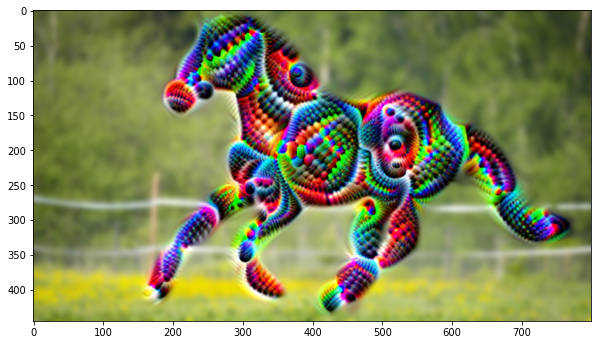

In [88]:
plt.rcParams['figure.figsize'] = 10,10
plt.imshow(out)